## Trabajo práctico N°3

Alumna: Clara Bureu

#### Importo las librerías

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
img1 = cv.imread('images/coca_logo_1.png')
img2 = cv.imread('images/coca_logo_2.png')
img3 = cv.imread('images/coca_multi.png')
img4 = cv.imread('images/coca_retro_1.png')
img5 = cv.imread('images/coca_retro_2.png')
img6 = cv.imread('images/COCA-COLA-LOGO.jpg')
img7 = cv.imread('images/logo_1.png')
img8 = cv.imread('template/pattern.png')

img_coca = [img1, img2, img3, img4, img5, img6, img7]

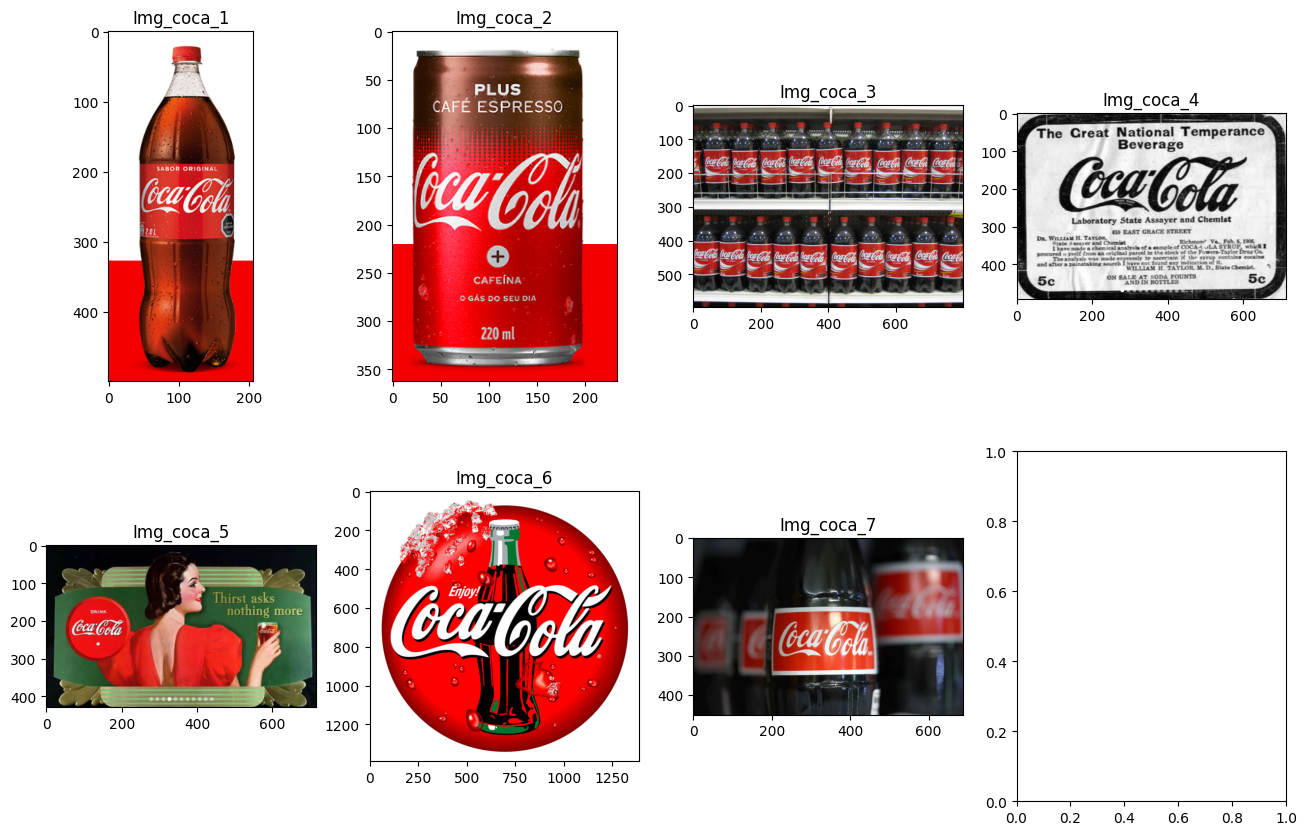

In [3]:
fig, axs = plt.subplots(2, 4, figsize=(16, 10))

for i, img in enumerate(img_coca):
    if img is not None and not img.size == 0:
        imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        plt.subplot(2, 4, i + 1)
        plt.imshow(imgRGB)
        plt.title(f'Img_coca_{i + 1}')
    else:
        print(f"Error: Img_coca_{i + 1} is empty or not loaded correctly.")


Text(0.5, 1.0, 'template_Canny')

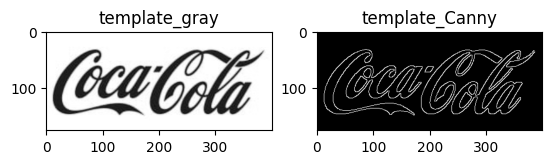

In [4]:
plt.subplot(1,2,1)
template_gray = cv.cvtColor(img8, cv.COLOR_BGR2GRAY)
plt.imshow(template_gray, cmap='gray')
plt.title('template_gray')

plt.subplot(1,2,2)
template = cv.Canny(template_gray, 50, 200)
w, h = template.shape[:2]
plt.imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB))
plt.title('template_Canny')

In [5]:
for i, img in enumerate(img_coca):  
    image_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Obtener las dimensiones
    h_tmp, w_tmp = template.shape
    h_img, w_img = image_gray.shape

    print(h_tmp, w_tmp, h_img, w_img)

175 400 500 207
175 400 363 233
175 400 598 799
175 400 493 715
175 400 429 715
175 400 1389 1389
175 400 450 687


La imagen 1 es muy pequeña para la detección.


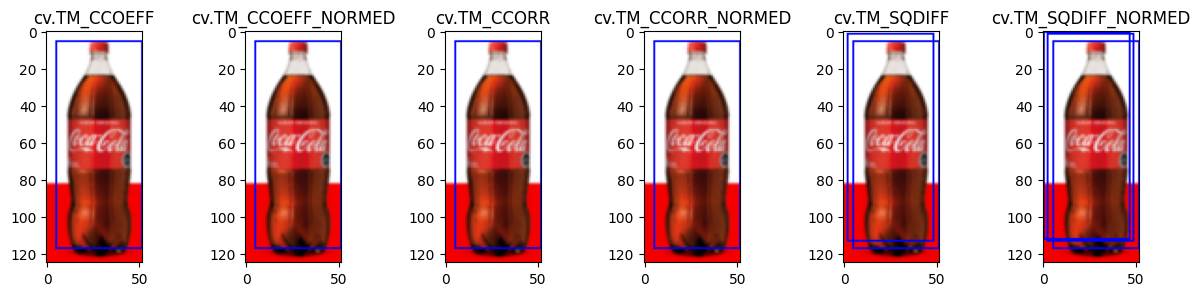

La imagen 2 es muy pequeña para la detección.


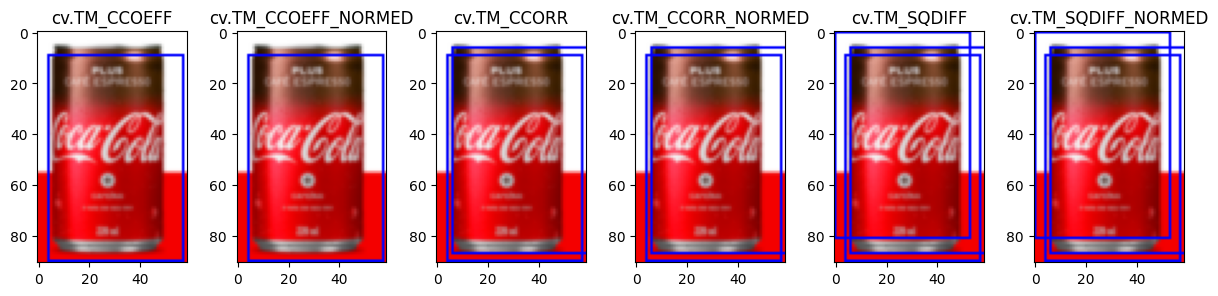

La imagen 3 es muy pequeña para la detección.


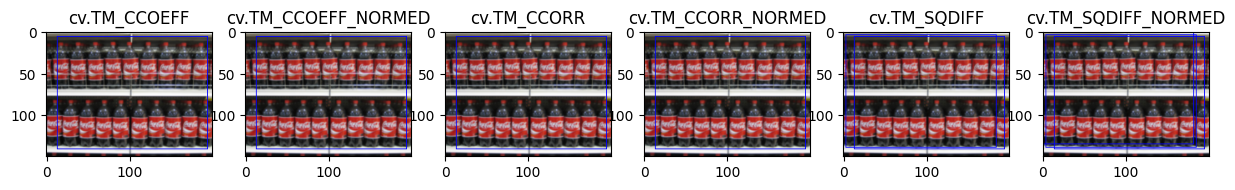

La imagen 4 es muy pequeña para la detección.


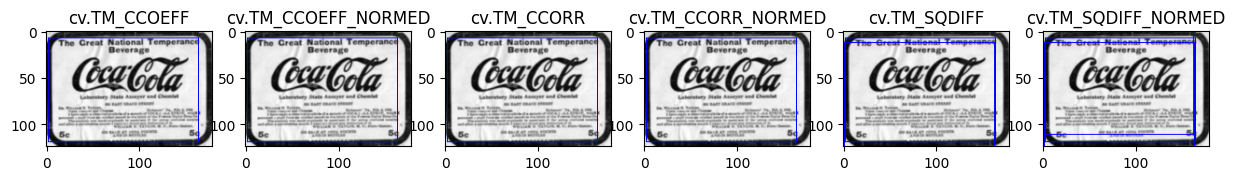

La imagen 5 es muy pequeña para la detección.


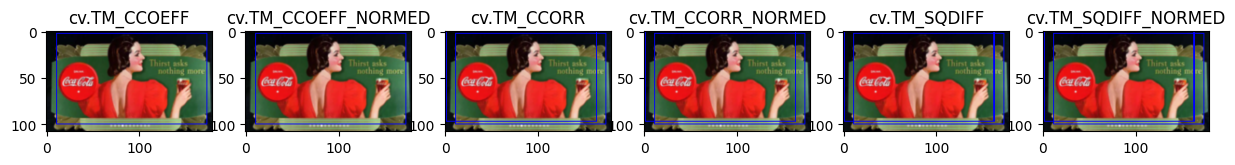

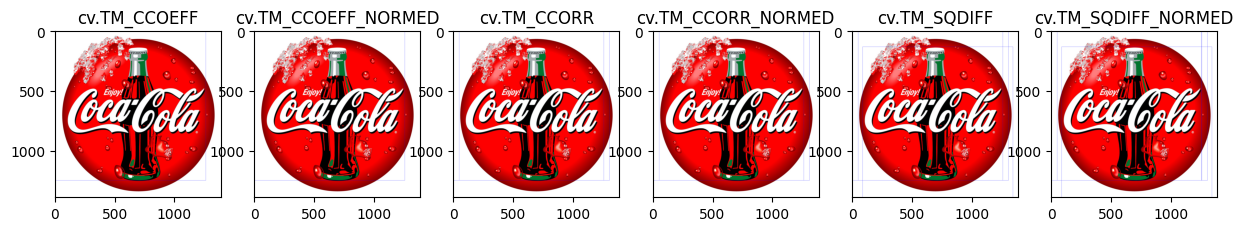

La imagen 7 es muy pequeña para la detección.


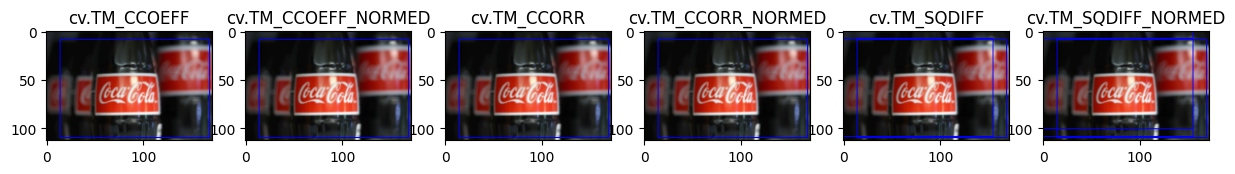

In [6]:

# Los 6 métodos posibles para comparación:
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
num_methods = len(methods)
scales = [0.5, 0.7, 0.9]
confidence = []

for i, img in enumerate(img_coca):     
    # Nivel 1
    img_nivel_1 = cv.pyrDown(img)

    # Verificar si el tamaño de la imagen es menor que el tamaño del template
    if img_nivel_1.shape[0] < h or img_nivel_1.shape[1] < w:
        print(f"La imagen {i + 1} es muy pequeña para la detección.")
        # Nivel 2
        img_nivel_2 = cv.pyrDown(img_nivel_1)
        img = img_nivel_2
        

    plt.figure(figsize=(15, 3))

    for j, meth in enumerate(methods, start=1):

        plt.subplot(1, num_methods, j)
        for scale in scales:
            template_resized = cv.resize(template, (int(img.shape[1] * scale), int(img.shape[0] * scale)))
            image_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
            img_salida = image_gray.copy()
            method = eval(meth)
            
            edged = cv.Canny(img_salida, 100, 200)

            res = cv.matchTemplate(edged, template_resized, method)
            h_rz, w_rz = template_resized.shape

            threshold = 0.8

            # Encontramos los valores máximos y mínimos
            min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

            confidence.append((max_val - min_val) / max_val)
            #print(f"{meth} - Confidence: {confidence:.2f}")
            
            # Si el método es TM_SQDIFF o TM_SQDIFF_NORMED, tomamos el mínimo
            if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
                top_left = min_loc
            else:
                top_left = max_loc

        idx = np.argmax(confidence)    
        # Marcamos el lugar donde lo haya encontrado
        bottom_right = (top_left[0] + w_rz, top_left[1] + h_rz)
        
        loc = np.where( res >= threshold)
        for pt in zip(*loc[::-1]):
            cv.rectangle(img, top_left, bottom_right, (255,0,0),0)
        
        plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        plt.title(meth)

    plt.show()
